# Import các thư viện


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter


# Đọc dữ liệu


In [ ]:
df = pd.read_csv("../Data/hotel_bookings_resort.csv")
df


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,3,0,0.00,0,0,Europe
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,4,0,0.00,0,0,Europe
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,0,98.00,0,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,2017-08-31,2017-09-10,Resort Hotel,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,...,1,0,0,0,1,0,89.75,0,0,Europe
33951,2017-08-30,2017-09-10,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,0,202.27,0,1,Europe
33952,2017-08-29,2017-09-12,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,0,153.57,0,3,Europe
33953,2017-08-31,2017-09-14,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,D,D,No Deposit,...,0,0,0,0,0,0,112.80,0,1,Europe


# chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [ ]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


vẽ biểu đồ cột adr theo từng tháng của từng continent thành có 6 biểu đồ riêng biệt


In [ ]:
df_defined = df[df["continent"] != "undefined"]

df_defined["month"] = df_defined["arrival_date"].dt.month

mean_adr_by_month = df_defined.groupby(["month", "continent"])["adr"].sum().unstack()

mean_adr_by_month


C:\Users\AdminPc\AppData\Local\Temp\ipykernel_22428\3318934116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defined['month'] = df_defined['arrival_date'].dt.month


continent,Africa,Asia,Europe,North_America,Oceania,South_America
month,,,,,,
1,617.53,1823.55,88035.89,796.88,356.91,2476.84
2,656.64,2240.30,126218.29,1567.54,157.10,1710.76
3,295.83,3768.91,144156.69,779.40,332.56,1425.97
4,942.24,3577.20,210148.23,3259.19,970.28,3449.25
5,1080.50,9296.54,213520.40,5220.86,1099.69,6038.35
6,825.00,13672.49,277398.73,8726.12,1217.93,7261.52
7,7672.52,31212.48,597567.79,16401.87,3011.65,13778.47
8,10130.63,21979.40,804941.92,18465.79,3484.04,12597.45
9,476.68,9096.26,225669.92,4144.66,661.83,3900.76


Vẽ biểu đồ


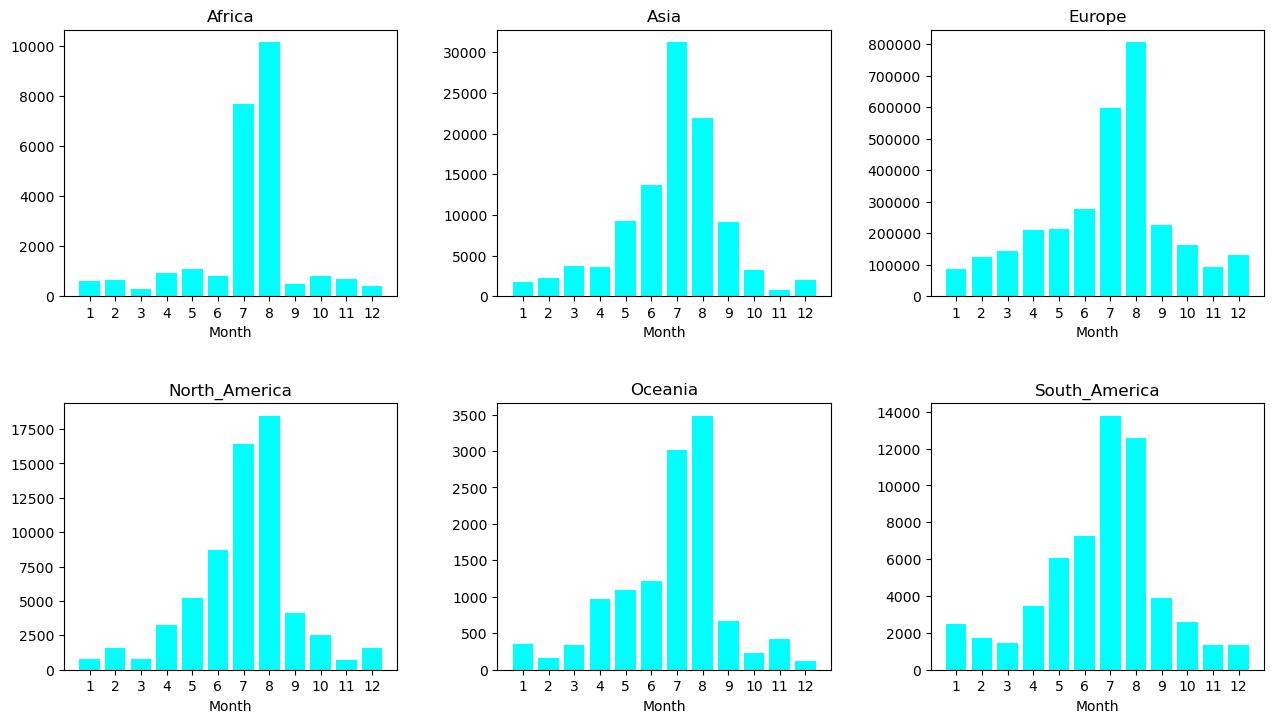

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

continents = mean_adr_by_month.columns.tolist()

for i, continent in enumerate(continents):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    ax.bar(mean_adr_by_month.index, mean_adr_by_month[continent], color="cyan")
    ax.set_xticks(mean_adr_by_month.index)
    ax.set_title(f"{continent}")
    ax.set_xlabel("Month")

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.4)
plt.show()


Ý nghĩa: Ở tất cả châu lục, tháng 7 và 8 có trung bình adr cao nhất và vượt trội so với các tháng khác, điều này được giải thích bởi việc số lượng khách đặt đơn vào thời điểm này là nhiều nhất


Thời điểm nào khách hàng có khả năng đặt phòng không như ý nhiều nhất


Tính số đơn không như ý theo từng ngày trong tháng


In [ ]:
df["month"] = df["arrival_date"].dt.month
df["day"] = df["arrival_date"].dt.day

df_assign_not_like_order = df[df["assigned_room_type"] != df["reserved_room_type"]]

num_order_assign_not_like_order_by_month = (
    df_assign_not_like_order.groupby(["month", "day"]).size().unstack()
)

num_order_assign_not_like_order_by_month


day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,7.0,14.0,23.0,22.0,13.0,13.0,20.0,16.0,21.0,19.0,...,16.0,25.0,28.0,29.0,47.0,33.0,33.0,17.0,25.0,25.0
2,37.0,26.0,35.0,39.0,29.0,30.0,20.0,21.0,19.0,31.0,...,29.0,27.0,27.0,28.0,30.0,25.0,12.0,10.0,NaN,NaN
3,26.0,43.0,16.0,32.0,17.0,9.0,16.0,26.0,35.0,14.0,...,22.0,16.0,16.0,16.0,4.0,4.0,25.0,22.0,35.0,48.0
4,13.0,8.0,15.0,22.0,50.0,22.0,15.0,19.0,33.0,9.0,...,29.0,21.0,9.0,12.0,26.0,22.0,16.0,35.0,14.0,NaN
5,20.0,28.0,17.0,8.0,10.0,10.0,17.0,27.0,28.0,8.0,...,16.0,22.0,38.0,22.0,19.0,5.0,19.0,15.0,19.0,22.0
6,16.0,25.0,6.0,7.0,6.0,23.0,6.0,14.0,10.0,13.0,...,13.0,16.0,8.0,10.0,22.0,6.0,8.0,6.0,12.0,NaN
7,25.0,25.0,13.0,13.0,11.0,23.0,11.0,6.0,10.0,8.0,...,6.0,16.0,18.0,23.0,12.0,27.0,10.0,20.0,25.0,12.0
8,18.0,9.0,23.0,14.0,13.0,5.0,19.0,10.0,17.0,22.0,...,22.0,17.0,15.0,14.0,8.0,11.0,16.0,30.0,20.0,13.0
9,12.0,10.0,24.0,19.0,13.0,11.0,13.0,10.0,8.0,19.0,...,10.0,19.0,18.0,7.0,27.0,8.0,13.0,13.0,14.0,NaN


Bỏ cột 30 và 31 đi và kiểm tra có giá trị nan không


In [ ]:
num_order_assign_not_like_order_by_month = (
    num_order_assign_not_like_order_by_month.drop(columns=[30, 31])
)


In [ ]:
null_values = num_order_assign_not_like_order_by_month.applymap(
    lambda x: pd.isnull(x)
).stack()

null_values = null_values[null_values]
null_values


Series([], dtype: bool)

Tính số đơn theo từng ngày trong tháng


In [ ]:
num_order_by_month = df.groupby(["month", "day"]).size().unstack()

num_order_by_month


day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,38.0,94.0,54.0,68.0,57.0,60.0,60.0,53.0,60.0,47.0,...,46.0,62.0,42.0,57.0,86.0,89.0,98.0,61.0,76.0,46.0
2,60.0,64.0,77.0,117.0,65.0,122.0,61.0,61.0,67.0,91.0,...,89.0,72.0,80.0,145.0,114.0,105.0,61.0,25.0,NaN,NaN
3,94.0,107.0,42.0,86.0,95.0,50.0,78.0,69.0,111.0,68.0,...,64.0,62.0,112.0,83.0,47.0,75.0,101.0,102.0,98.0,130.0
4,57.0,51.0,76.0,85.0,116.0,80.0,71.0,109.0,129.0,85.0,...,122.0,99.0,52.0,73.0,85.0,86.0,99.0,206.0,142.0,NaN
5,82.0,120.0,84.0,92.0,103.0,77.0,94.0,121.0,98.0,62.0,...,89.0,90.0,94.0,145.0,89.0,64.0,124.0,83.0,119.0,92.0
6,125.0,131.0,116.0,85.0,75.0,80.0,69.0,78.0,91.0,107.0,...,90.0,79.0,93.0,114.0,110.0,68.0,64.0,55.0,112.0,NaN
7,158.0,150.0,136.0,147.0,116.0,106.0,107.0,121.0,141.0,130.0,...,121.0,147.0,164.0,159.0,104.0,144.0,116.0,136.0,157.0,167.0
8,229.0,131.0,139.0,146.0,140.0,144.0,171.0,174.0,116.0,155.0,...,163.0,128.0,137.0,122.0,150.0,162.0,176.0,148.0,128.0,123.0
9,123.0,82.0,91.0,85.0,91.0,81.0,69.0,58.0,80.0,86.0,...,50.0,81.0,67.0,71.0,109.0,63.0,72.0,69.0,83.0,NaN


Bỏ cột 30 và 31 đi và kiểm tra có giá trị nan không


In [ ]:
num_order_by_month = num_order_by_month.drop(columns=[30, 31])
null_values = num_order_by_month.applymap(lambda x: pd.isnull(x)).stack()

null_values = null_values[null_values]
null_values


Series([], dtype: bool)

Tỉ lệ đơn không như ý theo từng ngày trong tháng


In [ ]:
percent_num_order_assign_not_like_order_by_month = (
    num_order_assign_not_like_order_by_month / num_order_by_month * 100
)
percent_num_order_assign_not_like_order_by_month = (
    percent_num_order_assign_not_like_order_by_month.round(2)
)

percent_num_order_assign_not_like_order_by_month


day,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
month,,,,,,,,,,,,,,,,,,,,,
1,18.42,14.89,42.59,32.35,22.81,21.67,33.33,30.19,35.00,40.43,...,50.98,39.44,34.78,40.32,66.67,50.88,54.65,37.08,33.67,27.87
2,61.67,40.62,45.45,33.33,44.62,24.59,32.79,34.43,28.36,34.07,...,22.92,28.81,32.58,37.50,33.75,19.31,26.32,23.81,19.67,40.00
3,27.66,40.19,38.10,37.21,17.89,18.00,20.51,37.68,31.53,20.59,...,26.83,25.30,34.38,25.81,14.29,19.28,8.51,5.33,24.75,21.57
4,22.81,15.69,19.74,25.88,43.10,27.50,21.13,17.43,25.58,10.59,...,25.64,16.36,23.77,21.21,17.31,16.44,30.59,25.58,16.16,16.99
5,24.39,23.33,20.24,8.70,9.71,12.99,18.09,22.31,28.57,12.90,...,20.90,10.47,17.98,24.44,40.43,15.17,21.35,7.81,15.32,18.07
6,12.80,19.08,5.17,8.24,8.00,28.75,8.70,17.95,10.99,12.15,...,22.22,14.74,14.44,20.25,8.60,8.77,20.00,8.82,12.50,10.91
7,15.82,16.67,9.56,8.84,9.48,21.70,10.28,4.96,7.09,6.15,...,11.56,9.92,4.96,10.88,10.98,14.47,11.54,18.75,8.62,14.71
8,7.86,6.87,16.55,9.59,9.29,3.47,11.11,5.75,14.66,14.19,...,10.60,2.94,13.50,13.28,10.95,11.48,5.33,6.79,9.09,20.27
9,9.76,12.20,26.37,22.35,14.29,13.58,18.84,17.24,10.00,22.09,...,18.42,23.68,20.00,23.46,26.87,9.86,24.77,12.70,18.06,18.84


Tìm khoảng tin cậy cho từng tháng


In [ ]:
def get_confident_interval_for_mean(row_data):
    ci = stats.bootstrap(
        (row_data,),
        np.mean,
        confidence_level=0.95,
        n_resamples=1000000,
        method="percentile",
    ).confidence_interval

    ci = [round(item, 2) for item in ci]

    return ci


confident_interval_for_mean = percent_num_order_assign_not_like_order_by_month.apply(
    lambda x: get_confident_interval_for_mean(x), axis=1
)

confident_interval_for_mean


month
1     [35.04, 43.59]
2     [28.87, 35.76]
3     [21.81, 27.98]
4     [18.24, 22.94]
5     [16.72, 21.76]
6     [10.77, 14.66]
7      [9.92, 12.67]
8       [8.6, 11.38]
9     [17.04, 21.54]
10    [21.15, 27.45]
11    [27.91, 36.35]
12    [27.15, 35.36]
dtype: object

Vẽ biểu đồ minh họa


In [ ]:
table = pd.DataFrame(
    columns=["lower", "upper"], index=confident_interval_for_mean.index
)

table["lower"] = confident_interval_for_mean.apply(lambda x: x[0])
table["upper"] = confident_interval_for_mean.apply(lambda x: x[1])

table


,lower,upper
month,,
1,35.04,43.59
2,28.87,35.76
3,21.81,27.98
4,18.24,22.94
5,16.72,21.76
6,10.77,14.66
7,9.92,12.67
8,8.60,11.38
9,17.04,21.54


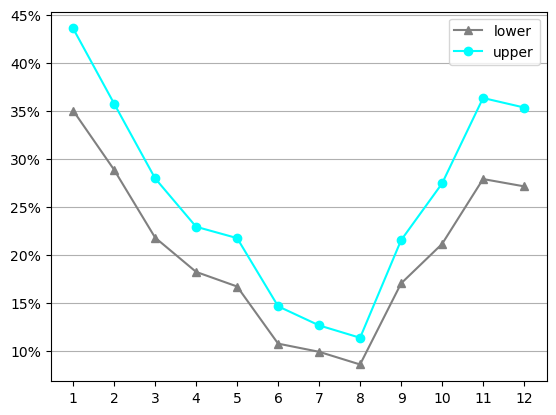

In [ ]:
def percent(x, pos):
    return f"{x:.0f}%"


plt.plot(table.index, table["lower"], marker="^", label="lower", color="grey")
plt.plot(table.index, table["upper"], marker="o", label="upper", color="cyan")
plt.xticks(table.index)
plt.legend()
plt.grid(axis="y")
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent))
plt.show()
